# Numerical integration of optical Bloch equations

Here are the optical Bloch equations, where $u,v,w$ are defined as in Atom-Photon Interaction, and $w_0$ is the value of $w$ at thermal equilibrium, and $T_1, T_2$ are the population decay and dephasing times contributing to decoherence.

$$ \frac{d}{dt}\begin{bmatrix}
u \\ v \\ w
\end{bmatrix} 
= 
\begin{bmatrix}
-1/T_2 & \delta & 0\\
\delta & -1/T_2 & \Omega_R(t) \\
0 & -\Omega_R(t) & -1/T_1
\end{bmatrix}

\begin{bmatrix}
u \\ v \\ w
\end{bmatrix} + 

\begin{bmatrix}
0 \\ 0 \\ w_0/T_1
\end{bmatrix}. $$



In [1]:
from obe import *

# Benchmarks
with infinite coherence times.

Let's first look at population oscillations, and compare a square to Blackman pulse window.

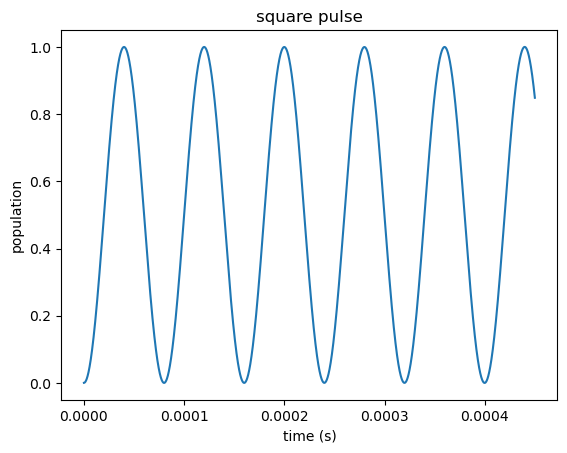

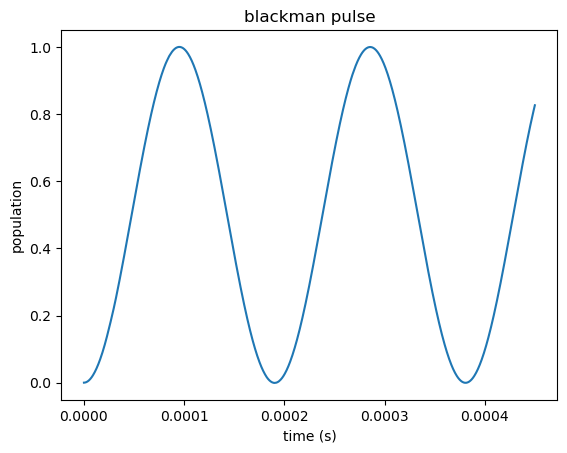

In [40]:
pulse = 'square'
t_max = 450e-6
rabi_freq_max = 2 * np.pi / (80e-6)
delta = 0
t2 = np.infty
times, populations = get_rabi_oscillations(pulse,
                                           delta,
                                           rabi_freq_max,
                                           t_max=t_max,
                                           t2=t2,
                                           n_points=10000)
plt.plot(times, populations)
plt.xlabel('time (s)')
plt.ylabel('population')
plt.title('square pulse')
plt.show()

pulse = 'blackman'
times, populations = get_rabi_oscillations(pulse,
                                           delta,
                                           rabi_freq_max,
                                           t_max=t_max,
                                           t2=t2,
                                           n_points=1000)
plt.plot(times, populations)
plt.xlabel('time (s)')
plt.ylabel('population')
plt.title('blackman pulse')
plt.show()

Let's look at some spectra (Blackman and square pulses).

100it [00:01, 75.05it/s]


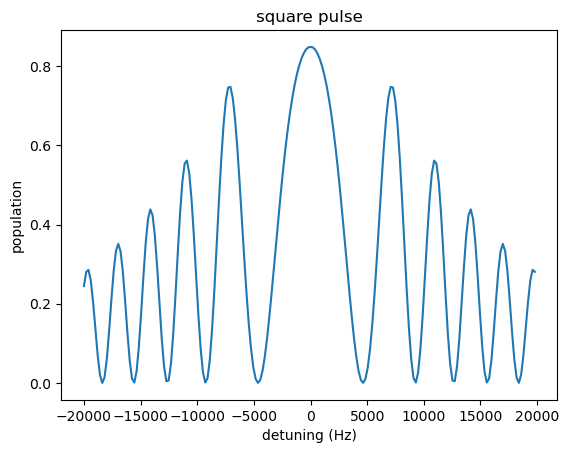

100it [00:00, 118.80it/s]


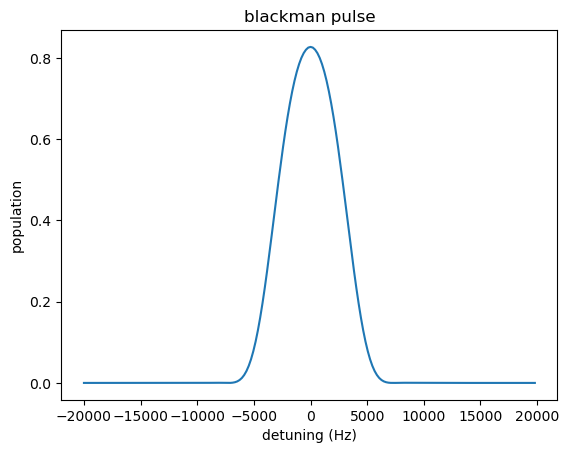

In [41]:
pulse = 'square'
t_max = 450e-6
# maximum rabi frequency for non-square pulses
rabi_freq_max = 2 * np.pi / (80e-6)
delta = 2 * np.pi * np.linspace(-20, 0, 100) * 1e3
t2 = np.infty
populations = get_spectrum(
    pulse,
    delta,
    rabi_freq_max,
    t_max,
    t2=t2,
    bloch_vec0=np.array([0, 0, 1])
)
plt.plot(np.concatenate([delta, -delta[-1:0:-1]])/(2 * np.pi), np.concatenate([populations, populations[-1:0:-1]]))
plt.xlabel('detuning (Hz)')
plt.ylabel('population')
plt.title('square pulse')
plt.show()

pulse = 'blackman'
t_max = 450e-6
# maximum rabi frequency for non-square pulses
rabi_freq_max = 2 * np.pi / (80e-6)
delta = 2 * np.pi * np.linspace(-20, 0, 100) * 1e3
t2 = np.infty
populations = get_spectrum(
    pulse,
    delta,
    rabi_freq_max,
    t_max,
    t2=t2,
    bloch_vec0=np.array([0, 0, 1])
)
plt.plot(np.concatenate([delta, -delta[-1:0:-1]])/(2 * np.pi), np.concatenate([populations, populations[-1:0:-1]]))
plt.xlabel('detuning (Hz)')
plt.ylabel('population')
plt.title('blackman pulse')
plt.show()


# More realistic cases

Let's see what happens with a finite dephasing time $T_2$. In this example, we are thinking about rf spectroscopy at ~20MHz between hyperfine ground states, so the spontaneous decay time is long.

We find that a pedestal develops when using a Blackman pulse, so we should really be careful about fitting these lineshapes with Gaussians when the coherence time becomes relevant.

100it [00:01, 87.10it/s]


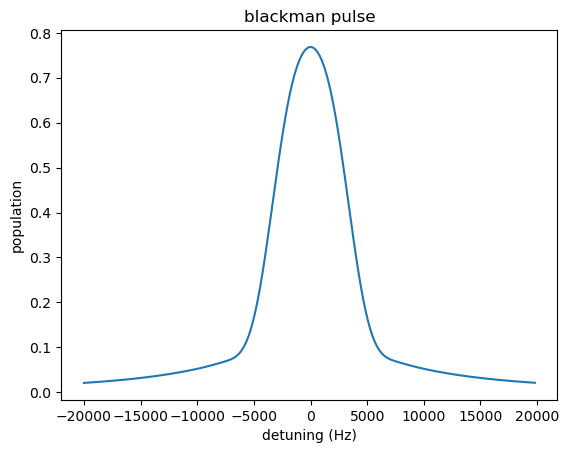

In [28]:
pulse = 'blackman'
t_max = 450e-6
# maximum rabi frequency for non-square pulses
rabi_freq_max = 2 * np.pi / (80e-6)
delta = 2 * np.pi * np.linspace(-20, 0, 100) * 1e3
t2 = 1e-3
populations = get_spectrum(
    pulse,
    delta,
    rabi_freq_max,
    t_max,
    t2=t2,
    bloch_vec0=np.array([0, 0, 1])
)
plt.plot(np.concatenate([delta, -delta[-1:0:-1]])/(2 * np.pi), np.concatenate([populations, populations[-1:0:-1]]))
plt.xlabel('detuning (Hz)')
plt.ylabel('population')
plt.title('blackman pulse')
plt.show()

As the pulse lengthens, to become comparable to $T_2$, the pedestal dominates, while a narrow central feature emerges.

pulse length (s):  0.001


100it [00:02, 49.73it/s]


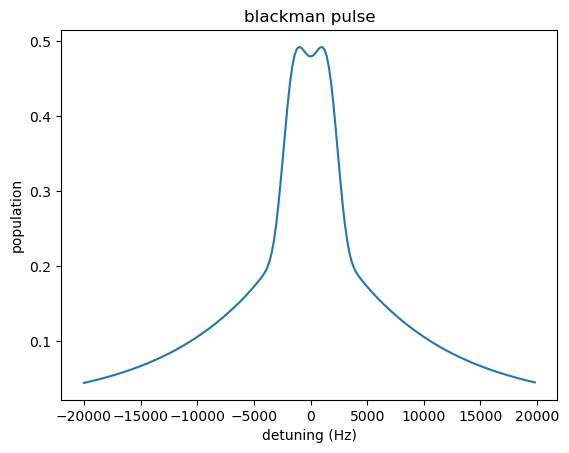

pulse length (s):  0.002


100it [00:02, 34.43it/s]


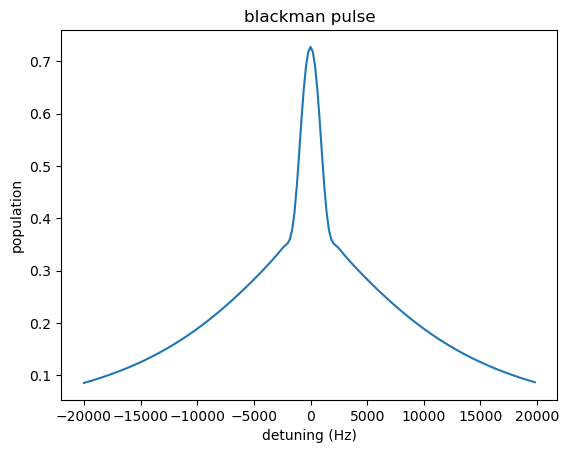

pulse length (s):  0.005


100it [00:06, 15.66it/s]


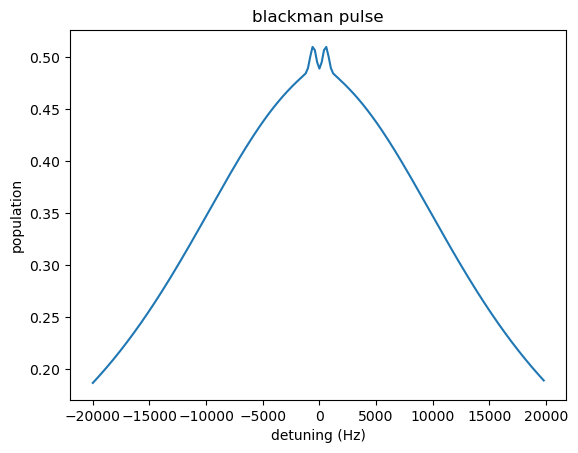

In [34]:
for t_max in [1e-3, 2e-3, 5e-3]:
    print('pulse length (s): ', t_max)
    pulse = 'blackman'
    # maximum rabi frequency for non-square pulses
    rabi_freq_max = 2 * np.pi / (80e-6)
    delta = 2 * np.pi * np.linspace(-20, 0, 100) * 1e3
    t2 = 1e-3
    populations = get_spectrum(
        pulse,
        delta,
        rabi_freq_max,
        t_max,
        t2=t2,
        bloch_vec0=np.array([0, 0, 1])
    )
    plt.plot(np.concatenate([delta, -delta[-1:0:-1]])/(2 * np.pi), np.concatenate([populations, populations[-1:0:-1]]))
    plt.xlabel('detuning (Hz)')
    plt.ylabel('population')
    plt.title('blackman pulse')
    plt.show()

This is perhaps a surprising effect of including only a finite $T_2$! No matter the detuning, the steady state solution is that the population difference goes to 0. This can be seen by solving for $u,v,w$ when setting $d[u,v,w]/dt = 0$.

This contrasts to our usual intuition from optical transitions, where both $T_1, T_2 > 0.$

detuning (Hz):  0.0


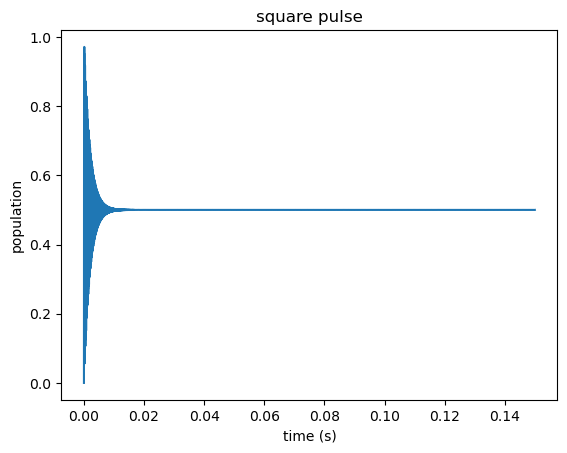

detuning (Hz):  50000.0


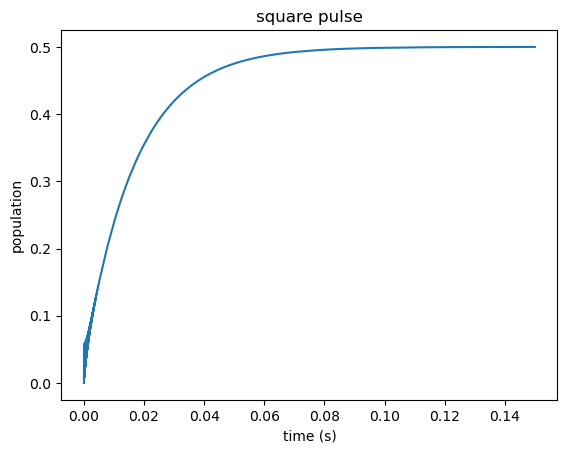

In [39]:
for delta in [0, 2 * np.pi * 50e3]:
    print('detuning (Hz): ', delta/2/np.pi)
    pulse = 'square'
    t_max = 150e-3
    rabi_freq_max = 2 * np.pi / (80e-6)
    t2 = 1e-3
    times, populations = get_rabi_oscillations(pulse,
                                            delta,
                                            rabi_freq_max,
                                            t_max=t_max,
                                            t2=t2,
                                            n_points=10000)
    plt.plot(times, populations)
    plt.xlabel('time (s)')
    plt.ylabel('population')
    plt.title('square pulse')
    plt.show()

Let's put $T_1=T_2$ and we find extremely narrow features for long pulses! (although this is unrealistic for rf spectroscopy)

pulse length (s):  0.001


100it [00:02, 48.73it/s]


pulse length (s):  0.002


100it [00:02, 38.60it/s]


pulse length (s):  0.005


100it [00:05, 16.72it/s]


pulse length (s):  0.025


100it [00:26,  3.80it/s]


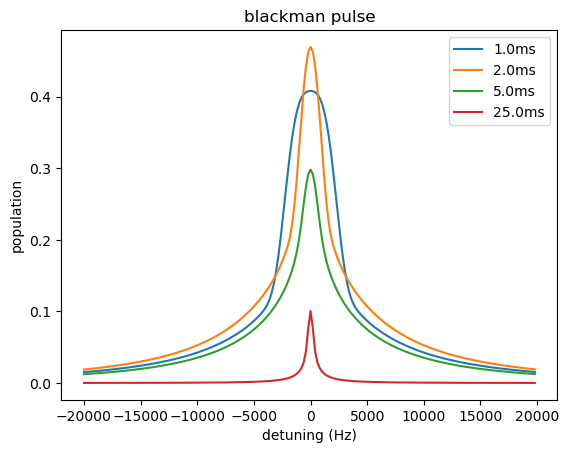

In [45]:
for t_max in [1e-3, 2e-3, 5e-3, 25e-3]:
    print('pulse length (s): ', t_max)
    pulse = 'blackman'
    # maximum rabi frequency for non-square pulses
    rabi_freq_max = 2 * np.pi / (80e-6)
    delta = 2 * np.pi * np.linspace(-20, 0, 100) * 1e3
    t2 = 1e-3
    t1 = 1e-3
    populations = get_spectrum(
        pulse,
        delta,
        rabi_freq_max,
        t_max,
        t2=t2,
        t1=t1,
        bloch_vec0=np.array([0, 0, 1])
    )
    plt.plot(np.concatenate([delta, -delta[-1:0:-1]])/(2 * np.pi), np.concatenate([populations, populations[-1:0:-1]]), label=str(t_max * 1e3) + 'ms')
plt.xlabel('detuning (Hz)')
plt.ylabel('population')
plt.title('blackman pulse')
plt.legend(loc='best')
plt.show()